# In this part of code, we utilize neural network applied on classification on more complicated problem. 


In [1]:
pip install -q optax dm-haiku

Note: you may need to restart the kernel to use updated packages.


## We create ten classes of the genrus of clothes, and then we are to classify each datas in y's class (WHICH KINDS OF CLOTHES IT IS?)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


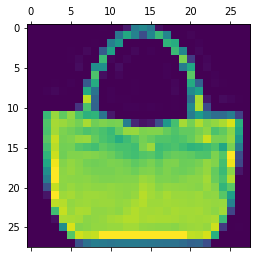

In [23]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import optax
import jax
import haiku as hk
import time
rng = jax.random.PRNGKey(0)

#X FOR MODELING
X = jnp.load('X.npy')

#Y TO BE CLASSIFIED
y = jnp.load('y.npy')

#DEFINE CLASSES
class_names = ['T-shirt/top',  # 0
               'Trouser',      # 1
               'Pullover',     # 2
               'Dress',        # 3
               'Coat',         # 4
               'Sandal',       # 5
               'Shirt',        # 6
               'Sneaker',      # 7
               'Bag',          # 8
               'Ankle boot']   # 9

plt.matshow(X[100].reshape(28, 28))
print(y[0])

## THE TWO PARTS BELOW is totally identical code of classification. 

In [3]:
import jax.numpy as jnp
import jax


def nnet(X):
    out = hk.Linear(64)(X)
    out = jax.nn.relu(out)

    out = hk.Linear(10)(out)

    out = jax.nn.softmax(out)
    out = jnp.squeeze(out)
    return out


init, nnet = hk.without_apply_rng(hk.transform(nnet))
rng = jax.random.PRNGKey(0)
Θ = init(rng, X[0])

In [4]:
lr = 1e-3
optimizer = optax.adam
opt_state = optimizer(lr).init(Θ)


def CE(prob, y_one_hot):
    from jax.scipy.special import xlogy
    return -xlogy(y_one_hot, prob).sum()
    # return - (y_one_hot * jnp.log(prob)).sum()


@jax.jit
def update(Θ, opt_state):
    def L(Θ):
        prob = nnet(Θ, X)
        return CE(prob, y)

    grads = jax.grad(L)(Θ)
    updates, opt_state = optimizer(lr).update(grads, opt_state)
    Θ = optax.apply_updates(Θ, updates)
    return Θ,  opt_state

## MINIMIZING THE CROSS ENTROPHY by GRADIENT DESCENT

In [24]:
time_st = time.time()
for iteration in range(10000):
    if iteration % 500 == 0: 
        print (iteration)
    Θ, opt_state = update(Θ, opt_state)
time_ed = time.time()
time_c= time_ed - time_st 
print('time cost', time_c, 's')

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
time cost 722.4335238933563 s


In [31]:
#回傳分在各組的機率
prob = nnet(Θ, X)
prob.shape

(60000, 10)

In [26]:
#哪組機率大就分在那組
print(jnp.argmax(prob, 1))

[9 0 0 ... 3 0 5]


In [27]:
#開猜對多少（準確率）
(jnp.argmax(prob, 1) == jnp.argmax(y, 1)).mean()

DeviceArray(0.99163336, dtype=float32)

In [28]:
jnp.argmax(y, 1)

DeviceArray([9, 0, 0, ..., 3, 0, 5], dtype=int32)

In [29]:
len(prob[0])

10